# Covid 19 Dataset Web Scrapping

**Importing basic Libraries**

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Testing the URL and sending request to grab JSON data**

In [2]:
url1 = "https://data.covid19india.org/v4/min/data.min.json"
url2 = "https://data.covid19india.org/v4/min/timeseries.min.json"

In [3]:
x=requests.get(url1)

In [4]:
x.status_code

200

In [5]:
y=requests.get(url2)

In [6]:
y.status_code

200

In [7]:
xt=json.loads(x.content)
xt['AN']

{'delta': {'tested': 1376, 'vaccinated1': 3, 'vaccinated2': 13},
 'delta21_14': {'confirmed': 9},
 'delta7': {'confirmed': 3,
  'recovered': 5,
  'tested': 8936,
  'vaccinated1': 884,
  'vaccinated2': 10640},
 'districts': {'Nicobars': {'delta7': {'vaccinated1': 62, 'vaccinated2': 811},
   'meta': {'population': 36842},
   'total': {'vaccinated1': 25394, 'vaccinated2': 20313}},
  'North and Middle Andaman': {'delta': {'vaccinated2': 8},
   'delta7': {'vaccinated1': 90, 'vaccinated2': 1839},
   'meta': {'population': 105597},
   'total': {'vaccinated1': 78945, 'vaccinated2': 59522}},
  'South Andaman': {'delta': {'vaccinated1': 3, 'vaccinated2': 28},
   'delta7': {'vaccinated1': 732, 'vaccinated2': 8012},
   'meta': {'population': 238142},
   'total': {'vaccinated1': 189662, 'vaccinated2': 120322}},
  'Unknown': {'delta21_14': {'confirmed': 9},
   'delta7': {'confirmed': 3, 'recovered': 5},
   'total': {'confirmed': 7651, 'deceased': 129, 'recovered': 7518}}},
 'meta': {'date': '2021-10

In [8]:
d1= {'state':[],
     'delta_tested':[],
     'delta_vaccinated1':[],
     'delta_vaccinated2':[],
     'delta7_confirmed':[],
     'delta7_recovered':[],
     'delta7_tested':[],
     'delta7_vaccinated1':[],
     'delta7_vaccinated2':[],
     'population':[],
     'total_confirmed': [],
  'total_deceased': [],
  'total_recovered': [],
  'total_tested': [],
  'total_vaccinated1': [],
  'total_vaccinated2': []}

In [9]:
for state in xt.keys():
  xt1=xt[state]
  d1['state'].append(state)
  for varient in ['delta']:
    xt2=xt1.get(varient)
    for status in ['tested','vaccinated1', 'vaccinated2']:
      if xt2 is None:
        value=None
      else:
        value=xt2.get(status)
      key= varient+"_"+status
      d1[key].append(value)
  for varient in ['delta7']:
    xt2=xt1.get(varient)
    for status in ['confirmed','recovered','tested','vaccinated1', 'vaccinated2']:
      if xt2 is None:
        value=None
      else:
        value=xt2.get(status)
      key= varient+"_"+status
      d1[key].append(value)
  for varient in ['meta']:
    xt2=xt1.get(varient)
    for status in ['population']:
      if xt2 is None:
        value=None
      else:
        value=xt2.get(status)
      key= "population"
      d1[key].append(value)
  for varient in ['total']:
    xt2=xt1.get(varient)
    for status in ['confirmed','deceased','recovered','tested','vaccinated1','vaccinated2']:
      if xt2 is None:
        value=None
      else:
        value=xt2.get(status)
      key= varient+"_"+status
      d1[key].append(value)
      
        

In [10]:
xdf=pd.DataFrame(d1)
xdf

,state,delta_tested,delta_vaccinated1,delta_vaccinated2,delta7_confirmed,delta7_recovered,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,population,total_confirmed,total_deceased,total_recovered,total_tested,total_vaccinated1,total_vaccinated2
0,AN,1376.0,3.0,13.0,3.0,5.0,8936.0,884,10640,397000,7651,129,7518,598033,294001,200157
1,AP,39848.0,20497.0,24137.0,2873.0,3590.0,254532.0,1223010,1887005,52221000,2066450,14373,2047722,29518787,32976969,20375181
2,AR,334.0,42.0,195.0,66.0,97.0,4788.0,3312,23647,1504000,55155,280,54774,1185436,771875,534486
3,AS,15060.0,19124.0,37463.0,2056.0,2215.0,269097.0,274869,849889,34293000,610645,5997,600974,24712042,20172463,8068795
4,BR,226443.0,114694.0,145827.0,40.0,31.0,1378539.0,1286708,2144970,119520000,726098,9661,716390,50531824,49874828,18346781
5,CH,1403.0,211.0,1282.0,28.0,20.0,10726.0,3680,21641,1179000,65351,820,64495,792851,926035,546981
6,CT,11869.0,21312.0,39393.0,205.0,103.0,147451.0,379374,604260,28724000,1006052,13577,992159,13709510,14851682,7343273
7,DL,56751.0,12482.0,11839.0,267.0,239.0,395086.0,160323,269146,19814000,1439870,25091,1414431,29427753,13055636,7425404
8,DN,NaN,3.0,20.0,NaN,2.0,NaN,2802,14244,959000,10681,4,10644,72410,660753,370255
9,GA,2361.0,2572.0,12404.0,222.0,409.0,19026.0,8418,46494,1540000,178108,3364,174392,1468399,1262568,911114


In [11]:
xdf.isnull().sum()

state                 0
delta_tested          1
delta_vaccinated1     3
delta_vaccinated2     1
delta7_confirmed      2
delta7_recovered      1
delta7_tested         1
delta7_vaccinated1    0
delta7_vaccinated2    0
population            0
total_confirmed       0
total_deceased        0
total_recovered       0
total_tested          0
total_vaccinated1     0
total_vaccinated2     0
dtype: int64

In [12]:
xdf.fillna(0,inplace=True)

In [13]:
xdf.isnull().sum()

state                 0
delta_tested          0
delta_vaccinated1     0
delta_vaccinated2     0
delta7_confirmed      0
delta7_recovered      0
delta7_tested         0
delta7_vaccinated1    0
delta7_vaccinated2    0
population            0
total_confirmed       0
total_deceased        0
total_recovered       0
total_tested          0
total_vaccinated1     0
total_vaccinated2     0
dtype: int64

In [72]:
xdf.set_index('state')

,delta_tested,delta_vaccinated1,delta_vaccinated2,delta7_confirmed,delta7_recovered,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,population,total_confirmed,total_deceased,total_recovered,total_tested,total_vaccinated1,total_vaccinated2,tr,category,death
state,,,,,,,,,,,,,,,,,,
AN,1376.0,3.0,13.0,3.0,5.0,8936.0,884,10640,397000,7651,129,7518,598033,294001,200157,1.506380,E,133
AP,39848.0,20497.0,24137.0,2873.0,3590.0,254532.0,1223010,1887005,52221000,2066450,14373,2047722,29518787,32976969,20375181,0.565267,D,18728
AR,334.0,42.0,195.0,66.0,97.0,4788.0,3312,23647,1504000,55155,280,54774,1185436,771875,534486,0.788189,E,381
AS,15060.0,19124.0,37463.0,2056.0,2215.0,269097.0,274869,849889,34293000,610645,5997,600974,24712042,20172463,8068795,0.720615,D,9671
BR,226443.0,114694.0,145827.0,40.0,31.0,1378539.0,1286708,2144970,119520000,726098,9661,716390,50531824,49874828,18346781,0.422790,C,9708
CH,1403.0,211.0,1282.0,28.0,20.0,10726.0,3680,21641,1179000,65351,820,64495,792851,926035,546981,0.672478,D,856
CT,11869.0,21312.0,39393.0,205.0,103.0,147451.0,379374,604260,28724000,1006052,13577,992159,13709510,14851682,7343273,0.477284,C,13893
DL,56751.0,12482.0,11839.0,267.0,239.0,395086.0,160323,269146,19814000,1439870,25091,1414431,29427753,13055636,7425404,1.485200,E,25439
DN,0.0,3.0,20.0,0.0,2.0,0.0,2802,14244,959000,10681,4,10644,72410,660753,370255,0.075506,A,37


In [73]:
xdf.to_excel('covid19.xlsx')

In [76]:
xdf.to_csv('covid19.csv')

In [15]:
m=xdf.mean()
s=xdf.std()

xdf<=m-3*s
xdf>=m+3*s
xdf[(xdf<=m-3*s)|(xdf>=m+3*s)].shape[0]

<ipython-input-15-df29f2c0a8ef>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m=xdf.mean()
<ipython-input-15-df29f2c0a8ef>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s=xdf.std()
<ipython-input-15-df29f2c0a8ef>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  xdf<=m-3*s
<ipython-input-15-df29f2c0a8ef>:5: FutureWarning: Automatic reindexing on DataFrame v

37

In [16]:
xdf.columns

Index(['state', 'delta_tested', 'delta_vaccinated1', 'delta_vaccinated2',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'delta7_vaccinated1', 'delta7_vaccinated2', 'population',
       'total_confirmed', 'total_deceased', 'total_recovered', 'total_tested',
       'total_vaccinated1', 'total_vaccinated2'],
      dtype='object')

In [17]:
yt=json.loads(y.content)
yt['AN']

{'dates': {'2020-03-26': {'delta': {'confirmed': 1},
   'delta7': {'confirmed': 1},
   'total': {'confirmed': 1}},
  '2020-03-27': {'delta': {'confirmed': 5},
   'delta7': {'confirmed': 6},
   'total': {'confirmed': 6}},
  '2020-03-28': {'delta': {'confirmed': 3},
   'delta7': {'confirmed': 9},
   'total': {'confirmed': 9}},
  '2020-03-29': {'delta7': {'confirmed': 9}, 'total': {'confirmed': 9}},
  '2020-03-30': {'delta': {'confirmed': 1},
   'delta7': {'confirmed': 10},
   'total': {'confirmed': 10}},
  '2020-03-31': {'delta7': {'confirmed': 10}, 'total': {'confirmed': 10}},
  '2020-04-01': {'delta7': {'confirmed': 10}, 'total': {'confirmed': 10}},
  '2020-04-02': {'delta7': {'confirmed': 9}, 'total': {'confirmed': 10}},
  '2020-04-03': {'delta7': {'confirmed': 4}, 'total': {'confirmed': 10}},
  '2020-04-04': {'delta7': {'confirmed': 1}, 'total': {'confirmed': 10}},
  '2020-04-05': {'delta7': {'confirmed': 1}, 'total': {'confirmed': 10}},
  '2020-04-06': {'total': {'confirmed': 10}},


In [18]:
d= {'state':[],'dates':[],'delta_confirmed':[],'delta_recovered':[],'delta_tested':[],'delta7_confirmed':[],\
    'delta7_recovered':[],'delta7_tested':[],'total_confirmed':[],'total_recovered':[],'total_tested':[]
    }

In [19]:
for state in yt.keys():
  yt1=yt[state]['dates']
  for dates in yt1.keys():
    yt2=yt1[dates]
    d['state'].append(state)
    d['dates'].append(dates)
    for varient in ['delta','delta7','total']:
      yt3=yt2.get(varient)
      for status in ['confirmed','recovered','tested']:
        if yt3 is None:
          value=None
        else:
          value=yt3.get(status)
        key= varient+"_"+status
        d[key].append(value)


In [20]:
for key in d.keys():
  print(len(d[key]),key)

21678 state
21678 dates
21678 delta_confirmed
21678 delta_recovered
21678 delta_tested
21678 delta7_confirmed
21678 delta7_recovered
21678 delta7_tested
21678 total_confirmed
21678 total_recovered
21678 total_tested


In [21]:
ydf=pd.DataFrame(d)
ydf

,state,dates,delta_confirmed,delta_recovered,delta_tested,delta7_confirmed,delta7_recovered,delta7_tested,total_confirmed,total_recovered,total_tested
0,AN,2020-03-26,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1,AN,2020-03-27,5.0,NaN,NaN,6.0,NaN,NaN,6.0,NaN,NaN
2,AN,2020-03-28,3.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN
3,AN,2020-03-29,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN
4,AN,2020-03-30,1.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21673,WB,2021-10-27,976.0,837.0,43322.0,6229.0,5658.0,270214.0,1589042.0,1561973.0,19039301.0
21674,WB,2021-10-28,990.0,845.0,45437.0,6386.0,5728.0,282633.0,1590032.0,1562818.0,19084738.0
21675,WB,2021-10-29,982.0,860.0,49017.0,6522.0,5796.0,291347.0,1591014.0,1563678.0,19133755.0
21676,WB,2021-10-30,980.0,880.0,47131.0,6528.0,5868.0,295319.0,1591994.0,1564558.0,19180886.0


In [22]:
ydf.fillna(0, inplace=True)

In [23]:
ydf.isnull().sum()

state               0
dates               0
delta_confirmed     0
delta_recovered     0
delta_tested        0
delta7_confirmed    0
delta7_recovered    0
delta7_tested       0
total_confirmed     0
total_recovered     0
total_tested        0
dtype: int64

In [24]:
m=ydf.mean()
s=ydf.std()

ydf<=m-3*s
ydf>=m+3*s
ydf[(ydf<=m-3*s)|(ydf>=m+3*s)].shape[0]

<ipython-input-24-cc8f57507f64>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m=ydf.mean()
<ipython-input-24-cc8f57507f64>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s=ydf.std()
<ipython-input-24-cc8f57507f64>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ydf<=m-3*s
<ipython-input-24-cc8f57507f64>:5: FutureWarning: Automatic reindexing on DataFrame v

21678

In [26]:
ydf.columns

Index(['state', 'dates', 'delta_confirmed', 'delta_recovered', 'delta_tested',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'total_confirmed', 'total_recovered', 'total_tested'],
      dtype='object')

In [27]:
ydf['death']=ydf['delta7_confirmed']-ydf['delta_recovered']

In [28]:
ydf.head()

,state,dates,delta_confirmed,delta_recovered,delta_tested,delta7_confirmed,delta7_recovered,delta7_tested,total_confirmed,total_recovered,total_tested,death
0,AN,2020-03-26,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,AN,2020-03-27,5.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,6.0
2,AN,2020-03-28,3.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,9.0
3,AN,2020-03-29,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,9.0
4,AN,2020-03-30,1.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,10.0


In [69]:
ydf.set_index('state')

,dates,delta_confirmed,delta_recovered,delta_tested,delta7_confirmed,delta7_recovered,delta7_tested,total_confirmed,total_recovered,total_tested,death
state,,,,,,,,,,,
AN,2020-03-26,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
AN,2020-03-27,5.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,6.0
AN,2020-03-28,3.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,9.0
AN,2020-03-29,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,9.0
AN,2020-03-30,1.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
WB,2021-10-27,976.0,837.0,43322.0,6229.0,5658.0,270214.0,1589042.0,1561973.0,19039301.0,5392.0
WB,2021-10-28,990.0,845.0,45437.0,6386.0,5728.0,282633.0,1590032.0,1562818.0,19084738.0,5541.0
WB,2021-10-29,982.0,860.0,49017.0,6522.0,5796.0,291347.0,1591014.0,1563678.0,19133755.0,5662.0


In [70]:
ydf.to_excel("covid_timeseries_final.xlsx")

In [71]:
ydf.to_csv("covid_timeseries_final.csv")

#1. Weekly evolution of number of confirmed cases, recovered cases, deaths, tests. 

In [29]:
ydf['dates']

0        2020-03-26
1        2020-03-27
2        2020-03-28
3        2020-03-29
4        2020-03-30
            ...    
21673    2021-10-27
21674    2021-10-28
21675    2021-10-29
21676    2021-10-30
21677    2021-10-31
Name: dates, Length: 21678, dtype: object

In [30]:
ydf['dates'] = pd.to_datetime(ydf['dates'])

In [31]:
ydf['dates']

0       2020-03-26
1       2020-03-27
2       2020-03-28
3       2020-03-29
4       2020-03-30
           ...    
21673   2021-10-27
21674   2021-10-28
21675   2021-10-29
21676   2021-10-30
21677   2021-10-31
Name: dates, Length: 21678, dtype: datetime64[ns]

In [32]:
gdf=ydf.groupby(ydf['dates'].dt.week).agg({'delta_confirmed':'sum', 'delta_recovered':'sum', 'delta_tested':'sum','death':'sum'})
gdf

<ipython-input-32-f539cda93fbc>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  gdf=ydf.groupby(ydf['dates'].dt.week).agg({'delta_confirmed':'sum', 'delta_recovered':'sum', 'delta_tested':'sum','death':'sum'})


,delta_confirmed,delta_recovered,delta_tested,death
dates,,,,
1,252282.0,292002.0,13197785.0,1504540.0
2,210486.0,237208.0,11706616.0,1358282.0
3,191998.0,237016.0,11264274.0,1142194.0
4,179906.0,209526.0,10194426.0,1089156.0
5,160948.0,198646.0,10341764.0,982698.0
6,154760.0,172022.0,10296099.0,927924.0
7,177782.0,155832.0,9877549.0,1000012.0
8,213372.0,174628.0,10811708.0,1212298.0
9,234430.0,192624.0,10793758.0,1372706.0


<Figure size 640x480 with 0 Axes>

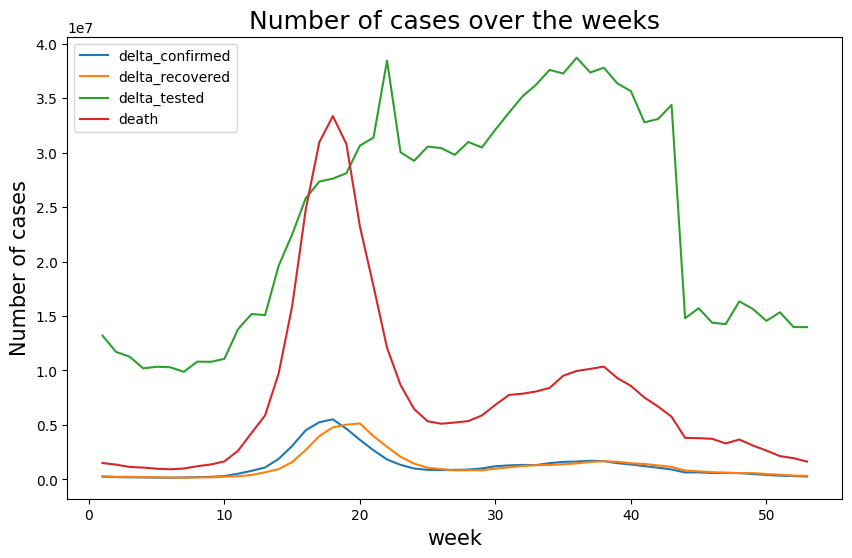

In [33]:
plt.figure()
gdf.plot(figsize=(10,6))
plt.xlabel("week", size=15)
plt.ylabel("Number of cases", size=15)
plt.title("Number of cases over the weeks", size=18)
plt.show()

## over the week it is shown like this

#2. Let’s call `testing ratio(tr) = (number of tests done) / (population)`, now categorise every district in one of the following categories:
#    - Category A: 0.05 ≤ tr ≤ 0.1
#    - Category B: 0.1 < tr ≤ 0.3
#    - Category C: 0.3 < tr ≤ 0.5
#    - Category D: 0.5 < tr ≤ 0.75
#    - Category E: 0.75 < tr ≤ 1.0
    
#    Now perform an analysis of number of deaths across all category. 

In [34]:
xdf.columns

Index(['state', 'delta_tested', 'delta_vaccinated1', 'delta_vaccinated2',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'delta7_vaccinated1', 'delta7_vaccinated2', 'population',
       'total_confirmed', 'total_deceased', 'total_recovered', 'total_tested',
       'total_vaccinated1', 'total_vaccinated2'],
      dtype='object')

In [35]:
xdf['tr']=xdf['total_tested']/xdf['population']

In [36]:
xdf

,state,delta_tested,delta_vaccinated1,delta_vaccinated2,delta7_confirmed,delta7_recovered,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,population,total_confirmed,total_deceased,total_recovered,total_tested,total_vaccinated1,total_vaccinated2,tr
0,AN,1376.0,3.0,13.0,3.0,5.0,8936.0,884,10640,397000,7651,129,7518,598033,294001,200157,1.506380
1,AP,39848.0,20497.0,24137.0,2873.0,3590.0,254532.0,1223010,1887005,52221000,2066450,14373,2047722,29518787,32976969,20375181,0.565267
2,AR,334.0,42.0,195.0,66.0,97.0,4788.0,3312,23647,1504000,55155,280,54774,1185436,771875,534486,0.788189
3,AS,15060.0,19124.0,37463.0,2056.0,2215.0,269097.0,274869,849889,34293000,610645,5997,600974,24712042,20172463,8068795,0.720615
4,BR,226443.0,114694.0,145827.0,40.0,31.0,1378539.0,1286708,2144970,119520000,726098,9661,716390,50531824,49874828,18346781,0.422790
5,CH,1403.0,211.0,1282.0,28.0,20.0,10726.0,3680,21641,1179000,65351,820,64495,792851,926035,546981,0.672478
6,CT,11869.0,21312.0,39393.0,205.0,103.0,147451.0,379374,604260,28724000,1006052,13577,992159,13709510,14851682,7343273,0.477284
7,DL,56751.0,12482.0,11839.0,267.0,239.0,395086.0,160323,269146,19814000,1439870,25091,1414431,29427753,13055636,7425404,1.485200
8,DN,0.0,3.0,20.0,0.0,2.0,0.0,2802,14244,959000,10681,4,10644,72410,660753,370255,0.075506
9,GA,2361.0,2572.0,12404.0,222.0,409.0,19026.0,8418,46494,1540000,178108,3364,174392,1468399,1262568,911114,0.953506


In [37]:
category = []
for cat in xdf['tr']:
    if 0.05<=cat<=0.1:    
      category.append('A')
    elif 0.1<cat<=0.3:  
      category.append('B')
    elif 0.3<cat<=0.5:  
      category.append('C')
    elif 0.5<cat<=0.75: 
      category.append('D')
    else:  
      category.append('E')

In [38]:
len(category)

37

In [39]:
xdf['category']=category

In [40]:
xdf


,state,delta_tested,delta_vaccinated1,delta_vaccinated2,delta7_confirmed,delta7_recovered,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,population,total_confirmed,total_deceased,total_recovered,total_tested,total_vaccinated1,total_vaccinated2,tr,category
0,AN,1376.0,3.0,13.0,3.0,5.0,8936.0,884,10640,397000,7651,129,7518,598033,294001,200157,1.506380,E
1,AP,39848.0,20497.0,24137.0,2873.0,3590.0,254532.0,1223010,1887005,52221000,2066450,14373,2047722,29518787,32976969,20375181,0.565267,D
2,AR,334.0,42.0,195.0,66.0,97.0,4788.0,3312,23647,1504000,55155,280,54774,1185436,771875,534486,0.788189,E
3,AS,15060.0,19124.0,37463.0,2056.0,2215.0,269097.0,274869,849889,34293000,610645,5997,600974,24712042,20172463,8068795,0.720615,D
4,BR,226443.0,114694.0,145827.0,40.0,31.0,1378539.0,1286708,2144970,119520000,726098,9661,716390,50531824,49874828,18346781,0.422790,C
5,CH,1403.0,211.0,1282.0,28.0,20.0,10726.0,3680,21641,1179000,65351,820,64495,792851,926035,546981,0.672478,D
6,CT,11869.0,21312.0,39393.0,205.0,103.0,147451.0,379374,604260,28724000,1006052,13577,992159,13709510,14851682,7343273,0.477284,C
7,DL,56751.0,12482.0,11839.0,267.0,239.0,395086.0,160323,269146,19814000,1439870,25091,1414431,29427753,13055636,7425404,1.485200,E
8,DN,0.0,3.0,20.0,0.0,2.0,0.0,2802,14244,959000,10681,4,10644,72410,660753,370255,0.075506,A
9,GA,2361.0,2572.0,12404.0,222.0,409.0,19026.0,8418,46494,1540000,178108,3364,174392,1468399,1262568,911114,0.953506,E


In [41]:
xdf['death']=xdf['total_confirmed']-xdf['total_recovered']

In [42]:
xdf

,state,delta_tested,delta_vaccinated1,delta_vaccinated2,delta7_confirmed,delta7_recovered,delta7_tested,delta7_vaccinated1,delta7_vaccinated2,population,total_confirmed,total_deceased,total_recovered,total_tested,total_vaccinated1,total_vaccinated2,tr,category,death
0,AN,1376.0,3.0,13.0,3.0,5.0,8936.0,884,10640,397000,7651,129,7518,598033,294001,200157,1.506380,E,133
1,AP,39848.0,20497.0,24137.0,2873.0,3590.0,254532.0,1223010,1887005,52221000,2066450,14373,2047722,29518787,32976969,20375181,0.565267,D,18728
2,AR,334.0,42.0,195.0,66.0,97.0,4788.0,3312,23647,1504000,55155,280,54774,1185436,771875,534486,0.788189,E,381
3,AS,15060.0,19124.0,37463.0,2056.0,2215.0,269097.0,274869,849889,34293000,610645,5997,600974,24712042,20172463,8068795,0.720615,D,9671
4,BR,226443.0,114694.0,145827.0,40.0,31.0,1378539.0,1286708,2144970,119520000,726098,9661,716390,50531824,49874828,18346781,0.422790,C,9708
5,CH,1403.0,211.0,1282.0,28.0,20.0,10726.0,3680,21641,1179000,65351,820,64495,792851,926035,546981,0.672478,D,856
6,CT,11869.0,21312.0,39393.0,205.0,103.0,147451.0,379374,604260,28724000,1006052,13577,992159,13709510,14851682,7343273,0.477284,C,13893
7,DL,56751.0,12482.0,11839.0,267.0,239.0,395086.0,160323,269146,19814000,1439870,25091,1414431,29427753,13055636,7425404,1.485200,E,25439
8,DN,0.0,3.0,20.0,0.0,2.0,0.0,2802,14244,959000,10681,4,10644,72410,660753,370255,0.075506,A,37
9,GA,2361.0,2572.0,12404.0,222.0,409.0,19026.0,8418,46494,1540000,178108,3364,174392,1468399,1262568,911114,0.953506,E,3716


In [43]:
xdf.to_excel("covid_19.xlsx")

In [44]:
gdf=xdf.groupby("category",as_index=False).agg({"death":"mean"}).round(2)

In [45]:
gdf

,category,death
0,A,37.00
1,B,12250.00
2,C,63912.09
3,D,29383.80
4,E,18421.64


Text(0.5, 1.0, 'category Vs death')

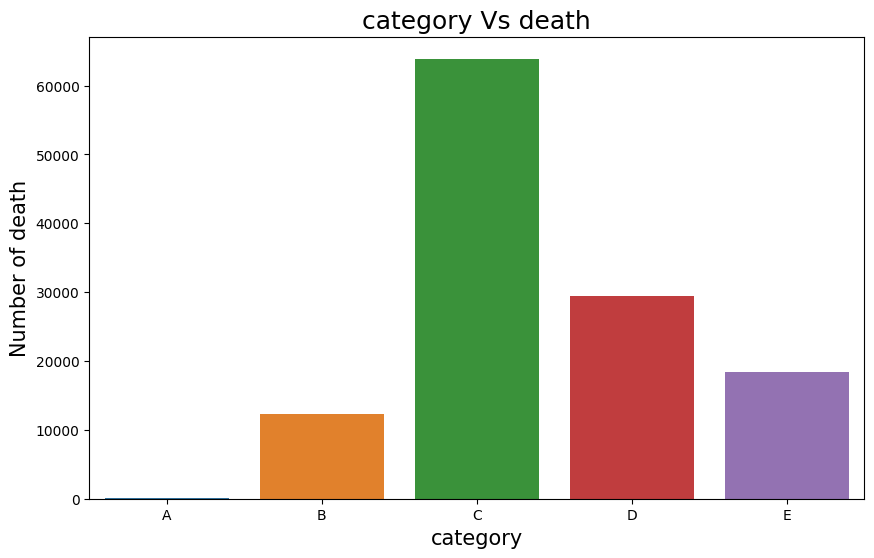

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=gdf, y="death", x="category")
plt.xlabel("category", size=15)
plt.ylabel("Number of death", size=15)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("category Vs death", size=18)

## Above graph show the number of deaths across all category

#3. Generate 2 - 3 insights that is very difficult to observe

In [47]:
ydf.columns

Index(['state', 'dates', 'delta_confirmed', 'delta_recovered', 'delta_tested',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'total_confirmed', 'total_recovered', 'total_tested', 'death'],
      dtype='object')

In [48]:
xdf.columns

Index(['state', 'delta_tested', 'delta_vaccinated1', 'delta_vaccinated2',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'delta7_vaccinated1', 'delta7_vaccinated2', 'population',
       'total_confirmed', 'total_deceased', 'total_recovered', 'total_tested',
       'total_vaccinated1', 'total_vaccinated2', 'tr', 'category', 'death'],
      dtype='object')

In [49]:
gdf=ydf.groupby(ydf['dates'].dt.week).agg({'total_confirmed':'sum','total_recovered':'sum'})
gdf

<ipython-input-49-b46ce9ef423d>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  gdf=ydf.groupby(ydf['dates'].dt.week).agg({'total_confirmed':'sum','total_recovered':'sum'})


,total_confirmed,total_recovered
dates,,
1,145788776.0,140496372.0
2,147384266.0,142267286.0
3,148763476.0,143932836.0
4,150062158.0,145468222.0
5,151243502.0,146897362.0
6,152343442.0,148187468.0
7,153499286.0,149311870.0
8,154886206.0,150479380.0
9,156451536.0,151738168.0


<Figure size 640x480 with 0 Axes>

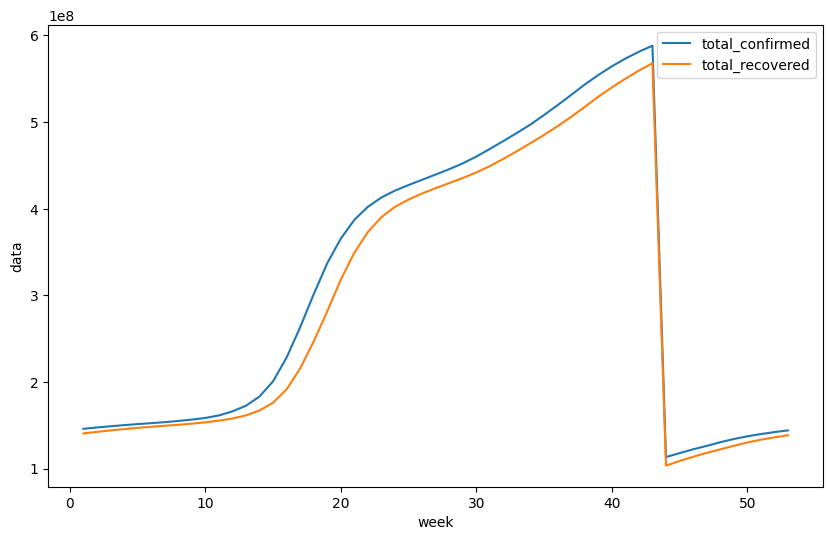

In [50]:
plt.figure()
gdf.plot(figsize=(10,6))
plt.xlabel("week")
plt.ylabel("data")
plt.show()

#4. Compare delta7 confirmed cases with respect to vaccination

In [51]:
xdf.columns

Index(['state', 'delta_tested', 'delta_vaccinated1', 'delta_vaccinated2',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'delta7_vaccinated1', 'delta7_vaccinated2', 'population',
       'total_confirmed', 'total_deceased', 'total_recovered', 'total_tested',
       'total_vaccinated1', 'total_vaccinated2', 'tr', 'category', 'death'],
      dtype='object')

In [52]:
ydf.columns

Index(['state', 'dates', 'delta_confirmed', 'delta_recovered', 'delta_tested',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'total_confirmed', 'total_recovered', 'total_tested', 'death'],
      dtype='object')

In [53]:
gdf=xdf.groupby(xdf['state']).agg({'delta7_confirmed':'sum','delta7_vaccinated1':'sum'})
gdf

,delta7_confirmed,delta7_vaccinated1
state,,
AN,3.0,884
AP,2873.0,1223010
AR,66.0,3312
AS,2056.0,274869
BR,40.0,1286708
CH,28.0,3680
CT,205.0,379374
DL,267.0,160323
DN,0.0,2802


<Figure size 640x480 with 0 Axes>

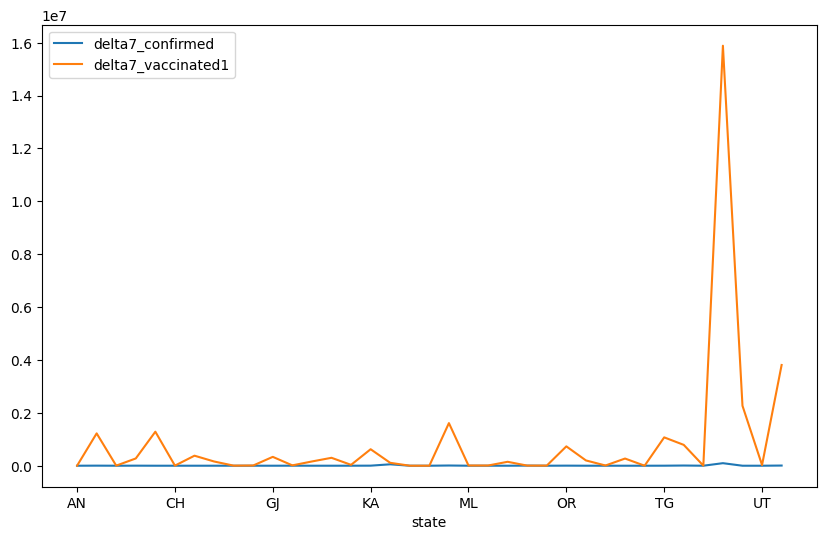

In [54]:
plt.figure()
gdf.plot(figsize=(10,6))
plt.show()

#5. Make at least 2 such KPI that presents the severity of case in different states (example: Any numerical measure to comment on how severe were the cases in Bihar as compared to that of Kerala)

In [55]:
ydf.columns

Index(['state', 'dates', 'delta_confirmed', 'delta_recovered', 'delta_tested',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'total_confirmed', 'total_recovered', 'total_tested', 'death'],
      dtype='object')

In [56]:
maha=ydf[ydf["state"]=="MH"]
madhya=ydf[ydf["state"]=="MP"]

MH=maha.groupby(ydf['dates'].dt.week)["delta7_recovered"].mean().round(2)
MP=madhya.groupby(ydf['dates'].dt.week)["delta7_recovered"].mean().round(2)

gdf=pd.concat([MH, MP],axis=1).reindex(MH.index)
gdf

<ipython-input-56-9804f71df708>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  MH=maha.groupby(ydf['dates'].dt.week)["delta7_recovered"].mean().round(2)
<ipython-input-56-9804f71df708>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  MP=madhya.groupby(ydf['dates'].dt.week)["delta7_recovered"].mean().round(2)


,delta7_recovered,delta7_recovered
dates,,
1,28258.57,5927.43
2,21755.71,4901.43
3,24971.57,4494.86
4,20073.86,3597.43
5,23448.86,2045.86
6,22078.86,1612.29
7,19114.29,1498.29
8,25594.29,1578.29
9,36618.00,1774.43


<Figure size 640x480 with 0 Axes>

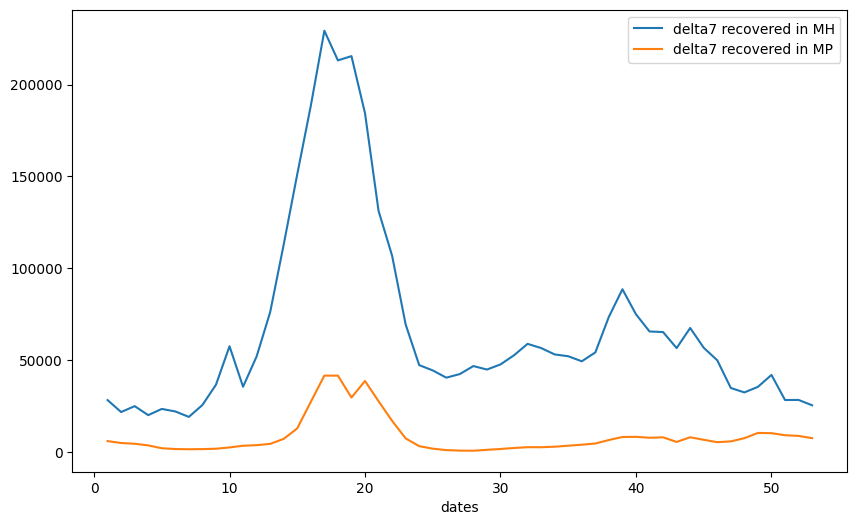

In [57]:
plt.figure()
gdf.plot(figsize=(10,6))
plt.legend(["delta7 recovered in MH","delta7 recovered in MP"])
plt.show()

In [58]:
ydf.columns

Index(['state', 'dates', 'delta_confirmed', 'delta_recovered', 'delta_tested',
       'delta7_confirmed', 'delta7_recovered', 'delta7_tested',
       'total_confirmed', 'total_recovered', 'total_tested', 'death'],
      dtype='object')

In [59]:
andra=ydf[ydf["state"]=="AN"]
kerala=ydf[ydf["state"]=="KA"]

AN=andra.groupby(ydf['dates'].dt.week)["total_confirmed"].mean().round(2)
KA=kerala.groupby(ydf['dates'].dt.week)["total_confirmed"].mean().round(2)

gdf=pd.concat([AN, KA],axis=1).reindex(AN.index)
gdf

<ipython-input-59-f7a165a692e3>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  AN=andra.groupby(ydf['dates'].dt.week)["total_confirmed"].mean().round(2)
<ipython-input-59-f7a165a692e3>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  KA=kerala.groupby(ydf['dates'].dt.week)["total_confirmed"].mean().round(2)


,total_confirmed,total_confirmed
dates,,
1,4954.57,925017.14
2,4974.00,930041.43
3,4991.00,934206.29
4,4994.00,937907.14
5,4996.29,941094.29
6,5007.29,944043.57
7,5013.14,946879.86
8,5016.86,949760.29
9,5022.57,953222.71


<Figure size 640x480 with 0 Axes>

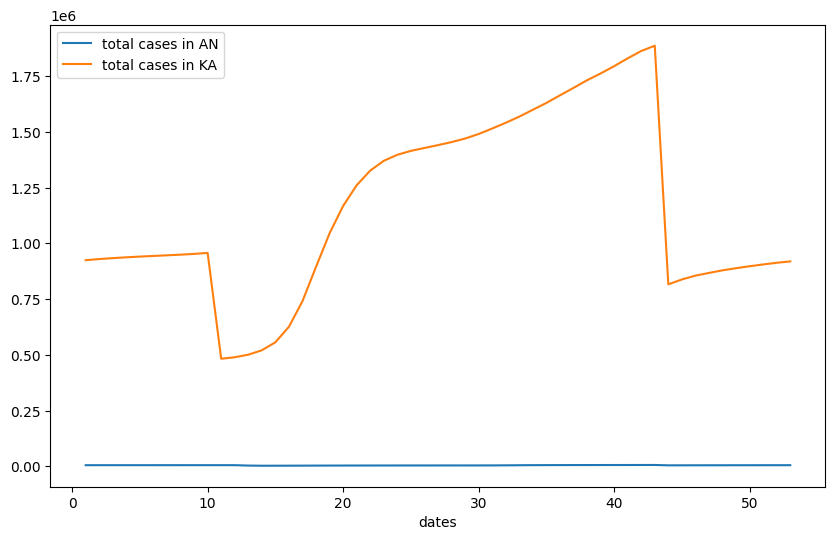

In [60]:
plt.figure()
gdf.plot(figsize=(10,6))
plt.legend(["total cases in AN","total cases in KA"])
plt.show()

#6. Categorise total number of confirmed cases in a state by Months and come up with that one month which was worst for India in terms of number of cases

In [61]:
gdf=ydf.groupby(ydf['dates'].dt.month)["total_confirmed"].max().to_frame()

In [62]:
gdf

,total_confirmed
dates,
1,10758629.0
2,11112057.0
3,12220717.0
4,19157196.0
5,28173883.0
6,30410768.0
7,31654741.0
8,32810746.0
9,33765502.0


<Figure size 640x480 with 0 Axes>

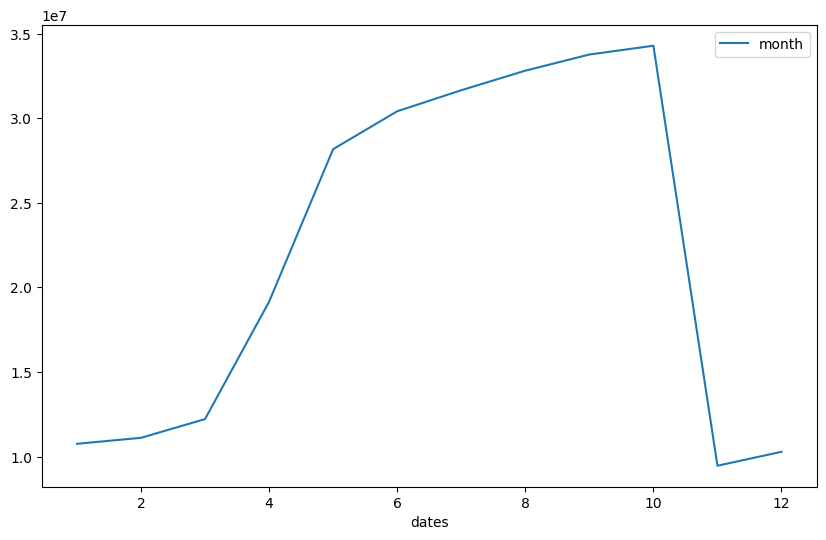

In [63]:
plt.figure()
gdf.plot(figsize=(10,6))
plt.legend(["month","max cases running"])
plt.show()

## From above graph its clear November is worst month for India in terms of number of cases
